In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import json

# Base directory for dataset
base_dir = '/kaggle/input/plant-village-dataset-updated'

# Load datasets with inferred class labels
train_set = tf.keras.utils.image_dataset_from_directory(
    base_dir,  # Adjust this to your directory structure
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    subset="training",
    validation_split=0.2,
    seed=123
)

val_set = tf.keras.utils.image_dataset_from_directory(
    base_dir,  # Adjust this to your directory structure
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    subset="validation",
    validation_split=0.2,
    seed=123
)

Found 67118 files belonging to 9 classes.
Using 53695 files for training.
Found 67118 files belonging to 9 classes.
Using 13423 files for validation.


In [3]:
# Vanilla CNN architecture
cnn_model = Sequential()

# First Convolutional Layer
cnn_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

# First Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2, strides=2))

# Second Convolutional Layer
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Second Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2, strides=2))

# Third Convolutional Layer
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))

# Third Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the output
cnn_model.add(Flatten())

# Fully Connected Layer
cnn_model.add(Dense(units=128, activation='relu'))

# Dropout layer to avoid overfitting
cnn_model.add(Dropout(0.5))

# Output layer with 9 classes for plant diseases
cnn_model.add(Dense(units=9, activation='softmax'))

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Ensure correct data format: Iterate over the dataset to check shapes
for images, labels in train_set.take(1):  # Get a single batch
    print(images.shape)  # Expected shape should be (32, 128, 128, 3)
    print(labels.shape)  # Expected shape should be (32, 9)

(32, 128, 128, 3)
(32, 9)


In [ ]:
# Training the model
history = cnn_model.fit(train_set, validation_data=val_set, epochs=10)

Epoch 1/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 173s 98ms/step - accuracy: 0.1953 - loss: 3.6471 - val_accuracy: 0.2055 - val_loss: 2.1670
Epoch 2/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.2117 - loss: 2.1553 - val_accuracy: 0.2369 - val_loss: 2.0858
Epoch 3/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.2458 - loss: 2.0774 - val_accuracy: 0.3244 - val_loss: 1.9002
Epoch 4/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.2698 - loss: 2.0051 - val_accuracy: 0.3272 - val_loss: 1.8647
Epoch 5/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.2999 - loss: 1.9223 - val_accuracy: 0.3346 - val_loss: 1.6697
Epoch 6/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.3619 - loss: 1.6779 - val_accuracy: 0.7989 - val_loss: 0.6136
Epoch 7/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.7433 - loss: 0.7425 - val_accuracy: 0.9203 - val_loss: 0.2527
Epoch 8/10
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.8698 

In [6]:
# Save the model and training history
cnn_model.save('/kaggle/working/vanilla_cnn_model.keras')
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

# Evaluate the model on the validation set
test_loss, test_acc = cnn_model.evaluate(val_set)
print(f"Test Accuracy: {test_acc*100:.2f}%")

420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9569 - loss: 0.1321
Test Accuracy: 95.69%


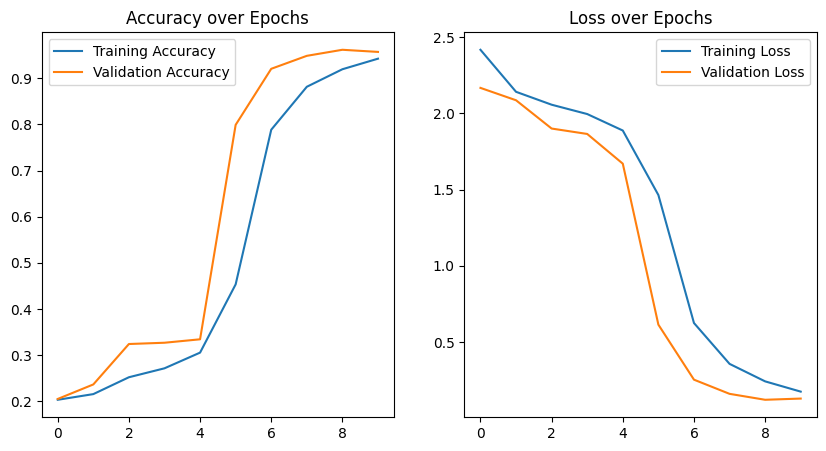

In [7]:
# Plotting training results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()